# Introduction to regression. In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house.

## Regression Mechanics

There is a need to fit a line into the data. Which could be done in various ways:
+ In two dimensions: *y = ax + b* (Simple linear regression uses one feature)
  - *y* = target
  - *x* = single feature
  - *a,b* = parameters/coefficients of the model - slope, intercept
+ How do we choose *a* and *b*?
  - Define an error function for any given line
  - Choose the line that minimizes the error function
+ Erro function = loss function = cost function
    

## The Loss Function and Ordinary Linear Regression

- In the loss function diagram below, we tried to fit a line(prediction) to the real observation.<br>
- We calculate the distance between each observation and the line. This distance is known as the **Residual**<br>
- To get the sum of the **residual**, and to avoid opposite residuals cancelling each other out, we add the square of individual residuals, which is known as **RSS**. This type of linear Regression is known as **Ordinary Least Squares(OLS)**, known for minimizing **RSS**<br>

![Loss Function](../images/loss-function-1.png)
![Loss Function](../images/loss-function-2.png)
![Loss Function](../images/loss-function-3.png)


## Linear Regression in Higher Dimensions

$$
y = a_1x_1 + a_2x_2 + b
$$

- To fit a linear regression model here:
  - Need to specify **3 variables**: \( a_1,\ a_2,\ b \)

- In higher dimensions:
  - Known as **multiple regression**
  - Must specify coefficients for each feature and the variable \( b \)

$$
y = a_1x_1 + a_2x_2 + a_3x_3 + \cdots + a_nx_n + b
$$


## 📉 Residual Sum of Squares (RSS)

**Definition**:  
The **sum of the squared differences** between actual values \( y_i \) and predicted values y_predict:

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Interpretation**:
- Measures the total squared error of the model.
- **Lower RSS** means the model fits the data better.
- **Scale-sensitive**: the larger the scale of the data, the larger the RSS.

---

## 📈 R-squared (R²)

**Definition**:  
A **relative measure** of how much variance in the dependent variable is explained by the model:

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

Where \( TSS \) is the **Total Sum of Squares**:

$$
TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

**Interpretation**:
- \( R^2 = 1 \): Perfect fit
- \( R^2 = 0 \): Model explains none of the variation
- It is **unitless** and **bounded between 0 and 1** (can be negative for poor models)

---

## Linear Regression in Sklearn

The default metric in sklearn is **R-squared**<br>
+ R-squared: quantifies the variance in target values explained by the features
  - Values range from 0 to 1
+ To compute R-squared:
```python
model.score(X_test, y_test)
```

# 📊 Mean Squared Error (MSE) vs Root Mean Squared Error (RMSE)

---

## 🔷 Mean Squared Error (MSE)

**Definition:**  
The average of the **squared differences** between actual values \( y_i \) and predicted values \( \hat{y}_i \):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Interpretation:**
- Measures the average squared error between predicted and true values.
- Penalizes **larger errors** more than smaller ones due to the squaring.
- **Units**: Squared units of the target variable (e.g., cm², dollars²)

---

## 🔷 Root Mean Squared Error (RMSE)

**Definition:**  
The square root of the MSE — this converts the error back to the **original unit** of the target variable:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

**Interpretation:**
- Easier to interpret than MSE because it's in the **same unit** as the original values.
- A lower RMSE indicates better predictive performance.
- Still sensitive to large errors and outliers.

---


## ✅ Summary

- Use **MSE** if you want to **strongly penalize large errors**.
- Use **RMSE** for **interpretability** — especially when communicating results to non-technical stakeholders.
- Both are appropriate for regression evaluation, but **sensitive to outliers**. Consider using **MAE** as well for a more robust view.


## Calculating MSE and RMSE in Sklearn

```python
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predict, square=False) # square=False means you are calculating RMSE, which puts the MSE in the same unit to what you are measuring
```

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
sales_df = pd.read_csv('../../data/advertising_and_sales_clean.csv')
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


## Using just one feature(Radio)

In [51]:
# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


In [53]:
print("X is of datatype: ", type(X))
X

X is of datatype:  <class 'numpy.ndarray'>


array([[ 6566.23],
       [ 9237.76],
       [15886.45],
       ...,
       [19800.07],
       [17534.64],
       [15966.69]])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
predictions = reg.predict(X_test)

print(predictions[:5])

[ 69614.40196636 104976.82354797 210026.94431821 208020.56460541
 304332.7140194 ]


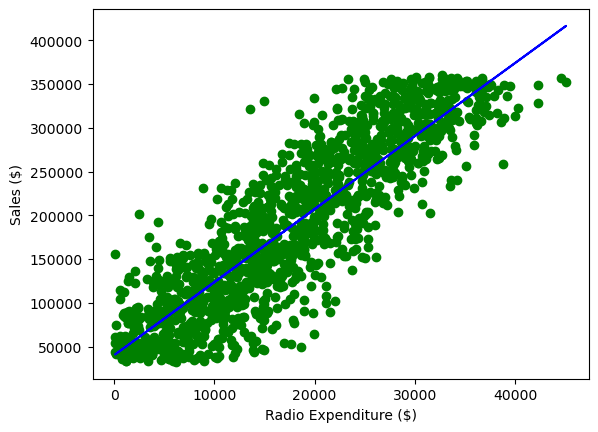

In [59]:
plt.plot(X_test, predictions,color="blue")
plt.scatter(X_test, y_test, color='green')
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()

In [63]:
reg.score(X_test, y_test)

0.7609020445216754

## Using more than one feature

In [99]:
X_all = sales_df.drop(['sales', 'influencer'], axis=1).values
y_all = sales_df['sales'].values

In [101]:
print(f" X type is: {type(X_all)}\n y type is: {type(y_all)}")

 X type is: <class 'numpy.ndarray'>
 y type is: <class 'numpy.ndarray'>


In [103]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

In [105]:
reg_all = LinearRegression()
reg_all.fit(X_train_all, y_train_all)

pred_all = reg_all.predict(X_test_all)

## Check accuracy
### R-squared

In [110]:
reg_all.score(X_test_all, y_test_all)

0.9990152104759368

In [139]:
# Compute RMSE
rmse = mean_squared_error(y_test_all, pred_all)
print(f"RMSE: {rmse}")

RMSE: 8669686.866907287


In [126]:
print(X_test_all.shape)
print(y_test_all.shape)
print(pred_all.shape)

(1364, 3)
(1364,)
(1364,)


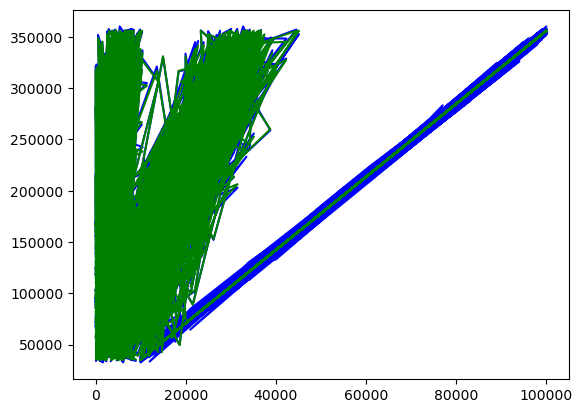

In [128]:
plt.plot(X_test_all, y_test_all, color='blue')
plt.plot(X_test_all, pred_all, color='green')
plt.show()